In [1]:
#--START--#
import pandas as pd

In [2]:
data = pd.read_csv('enron_email_20_percent.csv')

In [3]:
#Checking type and validity of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103480 entries, 0 to 103479
Data columns (total 52 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      103480 non-null  int64  
 1   Message-ID      103480 non-null  object 
 2   Date            103480 non-null  object 
 3   From            103480 non-null  object 
 4   To              99165 non-null   object 
 5   Subject         99656 non-null   object 
 6   X-From          103476 non-null  object 
 7   X-To            101679 non-null  object 
 8   X-cc            25663 non-null   object 
 9   X-bcc           39 non-null      object 
 10  X-Folder        103476 non-null  object 
 11  X-Origin        103476 non-null  object 
 12  X-FileName      102624 non-null  object 
 13  content         103246 non-null  object 
 14  user            103480 non-null  object 
 15  Cat_1_level_1   327 non-null     float64
 16  Cat_1_level_2   327 non-null     float64
 17  Cat_1_weig

In [4]:
#date and time intact
data['Date']

0         2000-12-11 09:22:00
1         2000-03-09 10:00:00
2         2000-02-04 18:14:00
3         2000-11-01 12:34:00
4         2000-11-29 15:43:00
                 ...         
103475    1999-09-09 17:51:00
103476    2001-05-03 13:34:00
103477    2000-08-21 17:33:00
103478    2001-01-17 18:11:00
103479    2001-04-13 10:43:00
Name: Date, Length: 103480, dtype: object

In [5]:
data.describe()

,Unnamed: 0,Cat_1_level_1,Cat_1_level_2,Cat_1_weight,Cat_2_level_1,Cat_2_level_2,Cat_2_weight,Cat_3_level_1,Cat_3_level_2,Cat_3_weight,...,Cat_9_weight,Cat_10_level_1,Cat_10_level_2,Cat_10_weight,Cat_11_level_1,Cat_11_level_2,Cat_11_weight,Cat_12_level_1,Cat_12_level_2,Cat_12_weight
count,103480.000000,327.0,327.000000,327.000000,289.000000,289.000000,289.000000,232.000000,232.000000,232.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,258428.879928,1.0,2.581040,1.651376,2.003460,3.069204,1.591696,2.327586,3.982759,1.538793,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,149261.811705,0.0,1.916671,0.496172,0.530319,3.196469,0.513093,0.585183,3.618095,0.524924,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,6.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,129517.250000,1.0,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,258514.500000,1.0,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,387474.250000,1.0,4.000000,2.000000,2.000000,4.000000,2.000000,3.000000,6.000000,2.000000,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,517400.000000,1.0,8.000000,3.000000,4.000000,13.000000,3.000000,4.000000,13.000000,4.000000,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Creating DataFrame according to my requirement
df = pd.DataFrame(data, columns=['Subject','From','To','Date'])

In [7]:
print(df)

                                                  Subject  \
0                                              Re: Travel   
1                                             Re: k#65403   
2            El Paso / ENA Deal Completely Terminated Now   
3                                        Re: FW: winnie_t   
4                                 Re: Address Information   
...                                                   ...   
103475                                      Re: Candidate   
103476                   Memo Regarding Washington Office   
103477                                   Re: Westinghouse   
103478                          Pages to print for Hunter   
103479  Start Date: 4/13/01; HourAhead hour: 11;  <COD...   

                                            From  \
0           frozenset({'susan.scott@enron.com'})   
1         frozenset({'scott.goodell@enron.com'})   
2        frozenset({'vince.kaminski@enron.com'})   
3       frozenset({'benjamin.rogers@enron.com'})   
4      

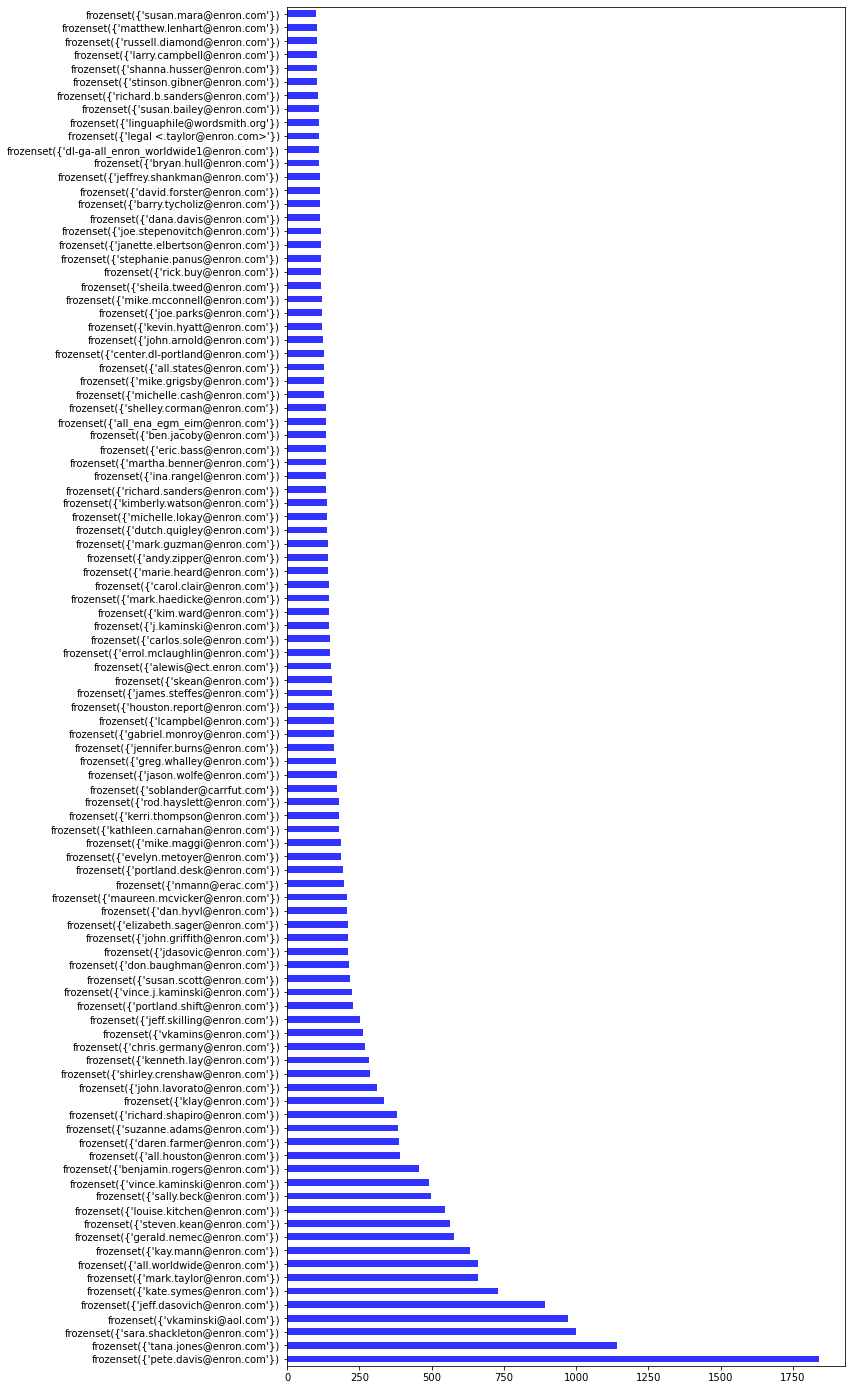

In [8]:
#Importing Matplot library to plot a chart showing employees who recieved maximum number of emails
#Later, I've shown the frequency of employees who sent and received maximum suspicious emails
import matplotlib.pyplot as plt
df['To'].value_counts().head(100).plot(kind='barh', figsize=(10,25), color='blue', alpha=0.8)

In [9]:
#Result clearly shows who all recieved maximum emails

In [11]:
#Now, I've manually sorted the whole dataset in Excel and listed down all the instances wherein all forms of the substring "Confidential" is used. 
#This enabled me to manipulate the dataframe and plot number of suspicious emails sent by employees of Enron
#Making different frames for each such instance

d1=df.loc[df['Subject'] == 'CONFIDENTIAL']
d2=df.loc[df['Subject'] == 'Confidential']
d3=df.loc[df['Subject'] == 'Confidential Information and Securities Trading']
d4=df.loc[df['Subject'] == 'Re: Confidential information']
d5=df.loc[df['Subject'] == 'NatSource LLC Confidentiality Agreement']
d6=df.loc[df['Subject'] == 'Re: Confidential - Don Black']
d7=df.loc[df['Subject'] == 'Re: List of EnronOnline Confidentiality Agreements']
d8=df.loc[df['Subject'] == 'Fw: CONFIDENTIAL AND PRIVILEGED ATTORNEY-CLIENT COMMUNICATION']
d9=df.loc[df['Subject'] == 'TW Gas Sales: PRIVILEGED AND CONFIDENTIAL ATTORNEY CLIENT PRIVILEGE']
d10=df.loc[df['Subject'] == 'RE: DWR Stranded Cost Update--CONFIDENTIAL']
d11=df.loc[df['Subject'] == 'List of EnronOnline Confidentiality Agreements']
d12=df.loc[df['Subject'] == 'Attached is an updated list of the Confidentiality Agreements.']
d13=df.loc[df['Subject'] == 'Confidential Folder to safely pass information to Arthur Andersen']
d14=df.loc[df['Subject'] == 'Request for Confidential Information by the GAO']
d15=df.loc[df['Subject'] == 'Confidentiality Agreement']
d16=df.loc[df['Subject'] == 'HIGHLY CONFIDENTIAL']
d17=df.loc[df['Subject'] == 'CONFIDENTIALITY AGREEMENT']
d18=df.loc[df['Subject'] == 'Re: Confidentiality Agreements']
d19=df.loc[df['Subject'] == 'Re: Confidential Employee Information/Lenhart']
d20=df.loc[df['Subject'] == 'Confidential Inquiry']
d21=df.loc[df['Subject'] == 'Re: Confidential - Notes from Portland Visit']
d22=df.loc[df['Subject'] == 'RE: confidentiality agreement']
d23=df.loc[df['Subject'] == 'CONFIDENTIAL - CA Customer Letter']
d24=df.loc[df['Subject'] == 'Re: Confidential --CFTC Chair']
d25=df.loc[df['Subject'] == 'URGENT AND CONFIDENTIAL']
d26=df.loc[df['Subject'] == 'RE: Privileged & confidential']
d27=df.loc[df['Subject'] == 'Re: FW: Confidentiality Agreement Annual Report [Agreement]']
d28=df.loc[df['Subject'] == 'CONFIDENTIAL: Attorney/Client Priveledge -- PX Data workbooks']
d29=df.loc[df['Subject'] == 'Re: Confidential']
d30=df.loc[df['Subject'] == 'Re: Private and Confidential']
d31=df.loc[df['Subject'] == 'Revlon? Hmmm...cute. How do you feel about trading mascera? -----Original Message----- From: Matthew.Lenhart@enron.com Sent: Friday, October 26, 2001 8:25 AM To: Hal.Lenhart@apollogrp.edu Subject: RE: sorry i had to run last night. so the word is now that enron has about 4 or 5 companies looking to take us over. aol, lucent, revlon?, and a few others. i will give you a call later. -----Original Message----- From: Hal Lenhart Sent: Wednesday, October 24, 2001 10:05 AM To: Lenhart, Matthew Subject: RE: It looks that way. Maybe I should sell to spark a rally. Hope things are going well otherwise. Talk to you soon. -----Original Message----- From: Lenhart, Matthew Sent: Wednesday, October 24, 2001 8:41 AM To: hfl@fp.edu Subject: enron is going to be a penny stock pretty soon. sec is investigating now. This e-mail is the property of Enron Corp. and/or its relevant affiliate and may contain confidential and privileged material for the sole use of the intended recipient (s). Any review, use, distribution or disclosure by others is strictly prohibited. If you are not the intended recipient (or authorized to receive for the recipient), please contact the sender or reply to Enron Corp. at and delete all copies of the message. This e-mail (and any attachments hereto) are not intended to be an offer (or an acceptance) and do not create or evidence a binding and enforceable contract between Enron Corp. (or any of its affiliates) and the intended recipient or any other party, and may not be relied on by anyone as the basis of a contract by estoppel or otherwise. Thank you.']

In [12]:
# Example :
print(d24)

                             Subject                                  From  \
7042   Re: Confidential --CFTC Chair  frozenset({'steven.kean@enron.com'})   
26424  Re: Confidential --CFTC Chair         frozenset({'wgramm@aol.com'})   
50341  Re: Confidential --CFTC Chair  frozenset({'steven.kean@enron.com'})   
66648  Re: Confidential --CFTC Chair         frozenset({'wgramm@aol.com'})   

                                             To                 Date  
7042   frozenset({'linda.robertson@enron.com'})  2001-02-14 14:28:00  
26424    frozenset({'steven.j.kean@enron.com'})  2001-02-14 08:58:00  
50341  frozenset({'linda.robertson@enron.com'})  2001-02-14 14:28:00  
66648    frozenset({'steven.j.kean@enron.com'})  2001-02-14 08:58:00  


In [13]:
#Assign all instances to a tuple 'frames'
frames = [d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, d16, d17, d18, d19, d20, d21, d22, d23, d24, d25, d26, d27, d28, d29, d30, d31]

In [14]:
#Concatenating the individual frames into one 'result'
result = pd.concat(frames)

In [15]:
print(result)

                            Subject                                     From  \
24160                  CONFIDENTIAL  frozenset({'david.delainey@enron.com'})   
27792                  CONFIDENTIAL     frozenset({'ray.alvarez@enron.com'})   
30331                  CONFIDENTIAL    frozenset({'diana.peters@enron.com'})   
75038                  CONFIDENTIAL    frozenset({'robert.bruce@enron.com'})   
97048                  CONFIDENTIAL     frozenset({'ray.alvarez@enron.com'})   
...                             ...                                      ...   
55490              Re: Confidential   frozenset({'mark.haedicke@enron.com'})   
71356              Re: Confidential  frozenset({'vince.kaminski@enron.com'})   
86632              Re: Confidential  frozenset({'vince.kaminski@enron.com'})   
88123              Re: Confidential     frozenset({'kay.chapman@enron.com'})   
19361  Re: Private and Confidential   frozenset({'chris.dorland@enron.com'})   

                                       

In [16]:
#Converting resultant dictionary into DataFrame for convenience & naming it as 'df'
df=pd.DataFrame.from_dict(result)

In [17]:
print(df)

                            Subject                                     From  \
24160                  CONFIDENTIAL  frozenset({'david.delainey@enron.com'})   
27792                  CONFIDENTIAL     frozenset({'ray.alvarez@enron.com'})   
30331                  CONFIDENTIAL    frozenset({'diana.peters@enron.com'})   
75038                  CONFIDENTIAL    frozenset({'robert.bruce@enron.com'})   
97048                  CONFIDENTIAL     frozenset({'ray.alvarez@enron.com'})   
...                             ...                                      ...   
55490              Re: Confidential   frozenset({'mark.haedicke@enron.com'})   
71356              Re: Confidential  frozenset({'vince.kaminski@enron.com'})   
86632              Re: Confidential  frozenset({'vince.kaminski@enron.com'})   
88123              Re: Confidential     frozenset({'kay.chapman@enron.com'})   
19361  Re: Private and Confidential   frozenset({'chris.dorland@enron.com'})   

                                       

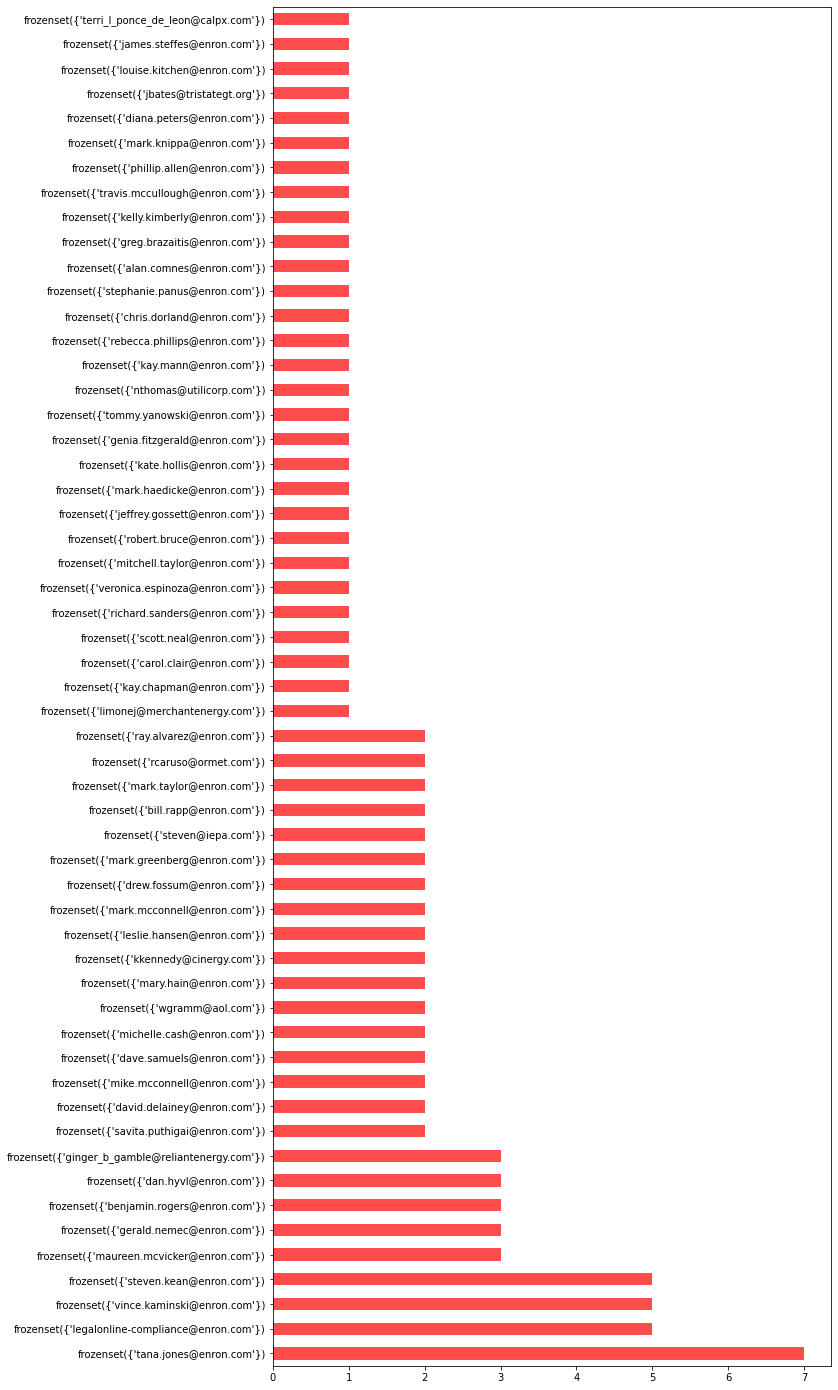

In [18]:
#As you can see, I've successfully received 100 such entries(But with repetitions of suspicious mails from some people)
#Now, Plotting a chart for frequency of suspicious emails sent by the same employee :

import matplotlib.pyplot as plt
df['From'].value_counts().head(100).plot(kind='barh', figsize=(10,25), color='red', alpha=0.7)

In [21]:
#Display Data that we have, but according to further requirement only
df[['Date', 'Subject']]

,Date,Subject
24160,2000-12-19 09:06:00,CONFIDENTIAL
27792,2001-06-26 19:46:00,CONFIDENTIAL
30331,2001-10-23 18:26:48,CONFIDENTIAL
75038,2001-04-30 11:28:00,CONFIDENTIAL
97048,2001-06-26 19:46:00,CONFIDENTIAL
...,...,...
55490,1999-07-19 11:49:00,Re: Confidential
71356,2000-10-18 15:09:00,Re: Confidential
86632,2000-08-30 17:43:00,Re: Confidential
88123,2000-11-13 13:31:00,Re: Confidential


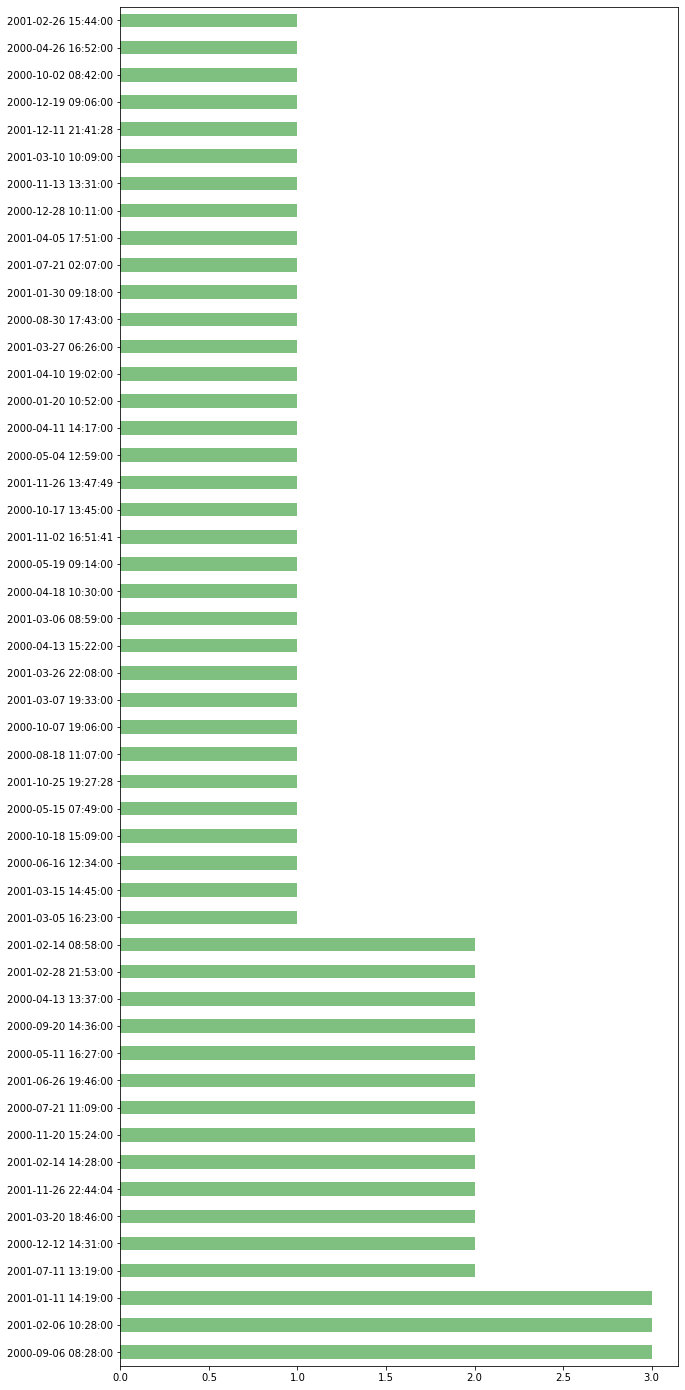

In [22]:
#Now I'm going to plot the frequency of suspicious emails sent and received on particualar Dates(First 50/100 entries taken) 
#This shows when malicious behaviour among the employees might be at it's peak

df['Date'].value_counts().head(50).plot(kind='barh', figsize=(10,25), color='green', alpha=0.5)

In [ ]:
#--END--#